# 1. Entrainement k-NN sur des digits

In [5]:
from sklearn.datasets import * ## chargement du package datasets contenant plusieurs jeu de données
import pandas as pd ## Chargement de Pandas
import matplotlib.pyplot as plt ## import de Matplotlib

from sklearn.model_selection import train_test_split ## classe utilitaire pour découper les jeux de données
from sklearn.neighbors import KNeighborsClassifier ## import de la classe de K-NN

In [6]:
#Méthodes displayImage et plot_digits pour afficher des données images (méthode optionnelle)
def displayImage(i):
    plt.imshow(digit['images'][i], cmap='Greys_r')
    plt.show()


def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))

In [7]:
#Affichage de jeu de données 
digit = load_digits() # chargement du dataset MNIST
dig = pd.DataFrame(digit['data'][0:1700]) # Création d'un dataframe Panda
dig.head() # affiche le tableau ci-dessous

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


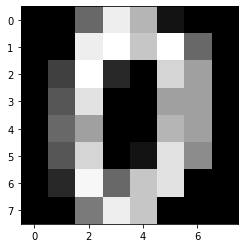

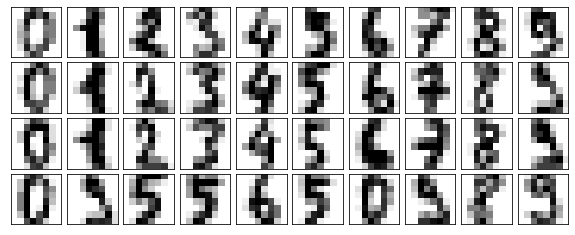

In [8]:
displayImage(0) # affichage de la première image du jeu de données MNIST
plot_digits(digit.data)

In [9]:
digit.keys()
train_x = digit.data
train_y = digit.target
x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,test_size=0.25)

In [10]:
KNN = KNeighborsClassifier(7)
KNN.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [11]:
#la précision par rapport aux données de test
print(KNN.score(x_test,y_test))

0.9866666666666667


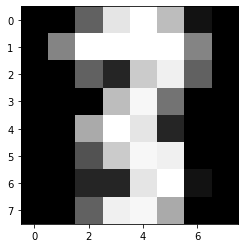

In [12]:
#Afficher un élement de la matrice format image 
import numpy as np
test = np.array(digit['data'][1726])
test1 = test.reshape(1,-1)
displayImage(1726)

In [13]:
#prédiction 
KNN.predict(test1)

array([3])

## Exercice

Renseignez-vous sur la classe KNeighborsClassifier de la bibliotheque scikitlearn. Testez des variations de paramètres : métrique, poids, algorithme. Gardez n_neighbors = 7. Affichez le score de chaque essai. Quel est le meilleur score que vous arrivez à atteindre ?

## Curse of dimensionality -> Application d'une PCA

In [75]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(digit.data) ## PCA avec 10 dimensions

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

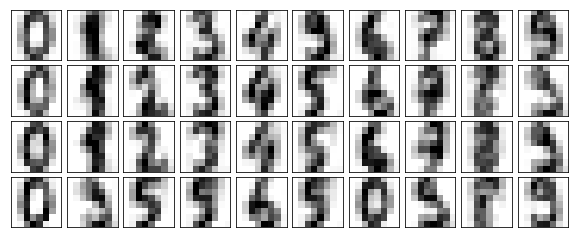

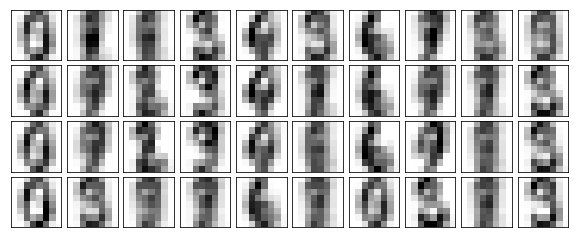

In [80]:
components = pca.transform(digit.data)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

## Exercices

1. Faites une PCA à trois dimensions sur le jeu de données des digits et affichez-le.
2. Relancez un k-NN (k=7) sur les données simplifiées. Quelles sont les modifications ?
3. Modifiez la valeur de k, entre 2 et 12. Quels sont les résultats ?

# 2. Arbres de décision / Random forests

In [28]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap, zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap,
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

## 2.a Classification avec arbres de décision

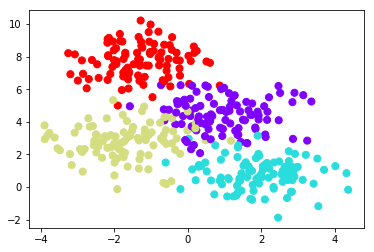

In [59]:
from sklearn.datasets import make_blobs
import numpy as np

X, y = make_blobs(n_samples=400, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

In [30]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth=3)
tree = classifier.fit(X, y)
y_pred = classifier.predict(X)

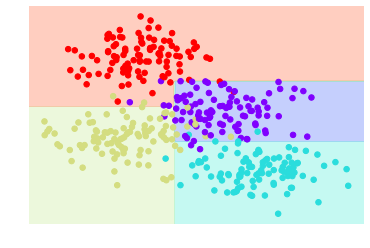

In [31]:
visualize_classifier(classifier,X,y)

In [19]:
from sklearn.metrics import classification_report, confusion_matrix,mean_absolute_error
print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))

ValueError: Found input variables with inconsistent numbers of samples: [48, 10]

## 2.b Régression avec arbres de décision

In [20]:
petrol_data = pd.read_csv('petrol_consumption.csv')
petrol_data.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [21]:
X = petrol_data.drop('Petrol_Consumption', axis=1) ## x sont les variables / paramètres fixes
y = petrol_data['Petrol_Consumption'] ## y est la variable a deviner
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) ## on divise nos données en 2 avec 20% de test

In [22]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train) ## on entraine le modele sur les données
y_pred = regressor.predict(X_test) ## on teste le modèle sur les données de test

In [23]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 58.2


### Exercice

Faites le même exercice en essayant de faire deviner la valeur de Average_Income avec respectivement 50%, 30% et 10% de données de test. Affichez l'erreur moyenne absolue dans chaque cas.

## 2.c Random forests

In [60]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=0)

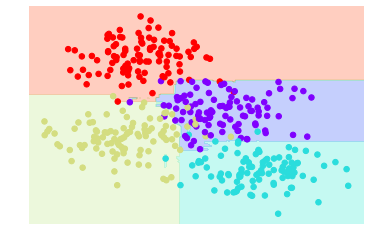

In [34]:
visualize_classifier(model, X, y);

### Exercice

1. Affichez des indicateurs de réussite pour cette random forest (matrice de confusion, rapport de classification).
2. Utilisez une random forest pour entrainer un modèle sur les digits. Faites varier le nombre d'estimateurs entre 1 et 100. Le score change-t-il ?